In [487]:
%load_ext autoreload
%autoreload 2
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
from mygp.gp import GP
import mygp.kernel as kernels  
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [579]:
# Generate data
key = jr.PRNGKey(1234)
train_x = jnp.array([-4, -3, -2, -1, 1, 2]).reshape(-1, 1)
sigma_n = 0.1
train_y  = jnp.sin(train_x) + sigma_n ** 2 * jr.normal(key, shape=train_x.shape)
X_s = jnp.linspace(-5, 5, 100).reshape(-1, 1)

In [580]:
# Initialize GP instance
sin_GP = GP(X_s, train_x, train_y, kernel=kernels.rbf, hyperparams={'sigma_f': 0.5, 'l': 0.3}, sigma_n=sigma_n)

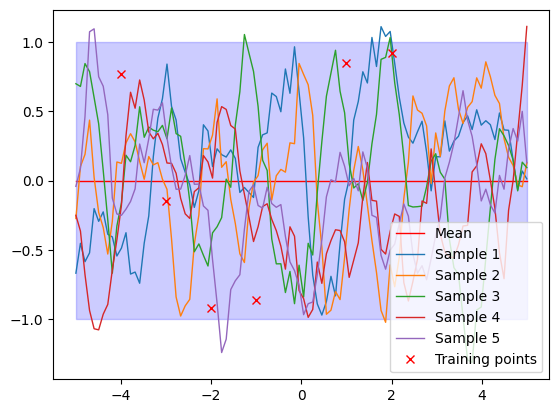

In [581]:
# Generate samples and print out the prior distribution
samples = jnp.asarray(np.random.multivariate_normal(sin_GP.mu.ravel(), sin_GP.cov, 5))
sin_GP.plot(train_x=train_x, train_y=train_y, samples=samples)

/var/folders/dc/6ng8g6b14dg84cqfwbrdk3nw0000gn/T/ipykernel_12413/2711401458.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  post_samples = jnp.asarray(np.random.multivariate_normal(sin_GP.mu.ravel(), sin_GP.cov, 5))


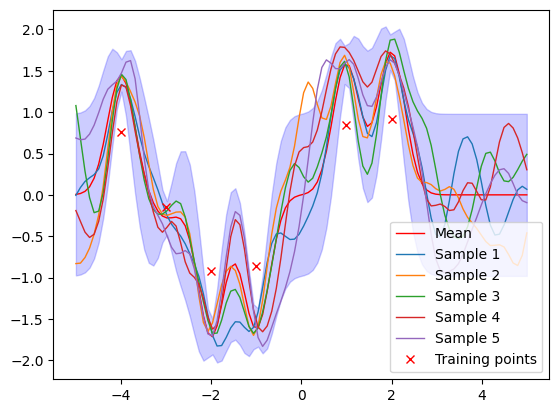

In [582]:
# Make predictions, and plot the posterior distribution
sin_GP.predict()
post_samples = jnp.asarray(np.random.multivariate_normal(sin_GP.mu.ravel(), sin_GP.cov, 5))
sin_GP.plot(train_x=train_x, train_y=train_y, samples=post_samples)

In [583]:
# Train the GP
num_epochs = 1000
print_every = 100
sin_GP.train(num_epochs=num_epochs, print_every=print_every)

Epoch 1: loss = 17.587
Epoch 101: loss = 10.263
Epoch 201: loss = 8.301
Epoch 301: loss = 7.487
Epoch 401: loss = 7.082
Epoch 501: loss = 6.849
Epoch 601: loss = 6.698
Epoch 701: loss = 6.591
Epoch 801: loss = 6.510
Epoch 901: loss = 6.443


In [584]:
sin_GP.train_state.params

FrozenDict({
    l: Array(0.94136834, dtype=float32),
    sigma_f: Array(0.7827762, dtype=float32),
    sigma_n: Array(0.2478761, dtype=float32),
})

/var/folders/dc/6ng8g6b14dg84cqfwbrdk3nw0000gn/T/ipykernel_12413/2146937610.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  test_samples = jnp.asarray(np.random.multivariate_normal(sin_GP.mu.ravel(), sin_GP.cov, 5))


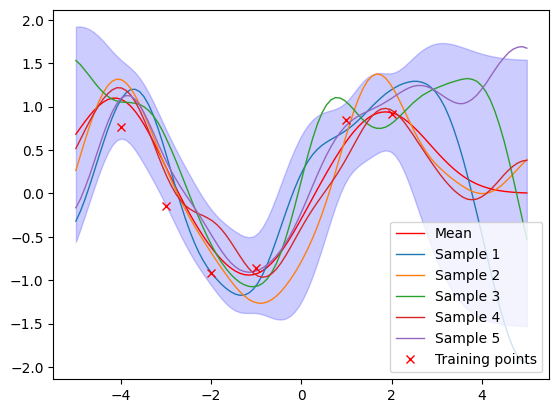

In [585]:
# Drawing samples from posterior after training loop and plotting
test_samples = jnp.asarray(np.random.multivariate_normal(sin_GP.mu.ravel(), sin_GP.cov, 5))
sin_GP.plot(train_x=train_x, train_y=train_y, samples=test_samples)